# Decision Tree Classification з використанням Python та Scikit-Learn

У цьому проекті побудовано класифікатор дерева рішень для класифікації видів ірисів. Фактично створено дві моделі, одну з критерієм «індекс Джіні», а іншу — з критерієм «ентропія». Питання класифікації з використанням дерева рішень вирішено за допомогою Python і Scikit-Learn. Для цього проекту використано набір даних Iris з бібліотеки scikit-learn.

## Опис набору даних

Набір даних Iris містить 150 зразків з 3 різних видів ірисів (Iris setosa, Iris virginica та Iris versicolor). Для кожного зразка виміряно 4 ознаки:
- довжина чашолистка (sepal length)
- ширина чашолистка (sepal width) 
- довжина пелюстки (petal length)
- ширина пелюстки (petal width)

На основі цих вимірювань потрібно передбачити вид ірису.

## Імпорт додаткових бібліотек

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Завантаження набору даних

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()

# Створення DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['class'] = iris.target

## Пошуковий аналіз даних

In [6]:
# Перегляд розмірів набору даних
print("Розміри набору даних:", df.shape)

# Перегляд перших рядків
print("\nПерші 5 рядків набору даних:")
print(df.head())

# Статистичний опис
print("\nСтатистичний опис набору даних:")
print(df.describe())

# Перевірка пропущених значень
print("\nКількість пропущених значень:")
print(df.isnull().sum())

Розміри набору даних: (150, 5)

Перші 5 рядків набору даних:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0  

Статистичний опис набору даних:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.8000

## Оголошення вектора ознак і цільової змінної

In [7]:
X = df.drop(['class'], axis=1)
y = df['class']

## Розбиття даних на навчальний та тестовий набори

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Класифікатор дерева рішень з критерієм gini-index

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Створення та навчання моделі з gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

# Прогнозування
y_pred_gini = clf_gini.predict(X_test)

# Оцінка точності
from sklearn.metrics import accuracy_score
print('Оцінка точності моделі за критерієм індексу Джіні: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

# Порівняння точності на тренувальному та тестовому наборах
print('\nТочність на тренувальному наборі: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Точність на тестовому наборі: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Оцінка точності моделі за критерієм індексу Джіні: 0.9800

Точність на тренувальному наборі: 0.9700
Точність на тестовому наборі: 0.9800


## Класифікатор дерева рішень з критерієм ентропії

In [10]:
# Створення та навчання моделі з entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(X_train, y_train)

# Прогнозування
y_pred_en = clf_en.predict(X_test)

# Оцінка точності
print('Оцінка точності моделі за критерієм ентропії: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))

# Порівняння точності на тренувальному та тестовому наборах
print('\nТочність на тренувальному наборі: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Точність на тестовому наборі: {:.4f}'.format(clf_en.score(X_test, y_test)))

Оцінка точності моделі за критерієм ентропії: 0.9800

Точність на тренувальному наборі: 0.9700
Точність на тестовому наборі: 0.9800


## Матриця помилок

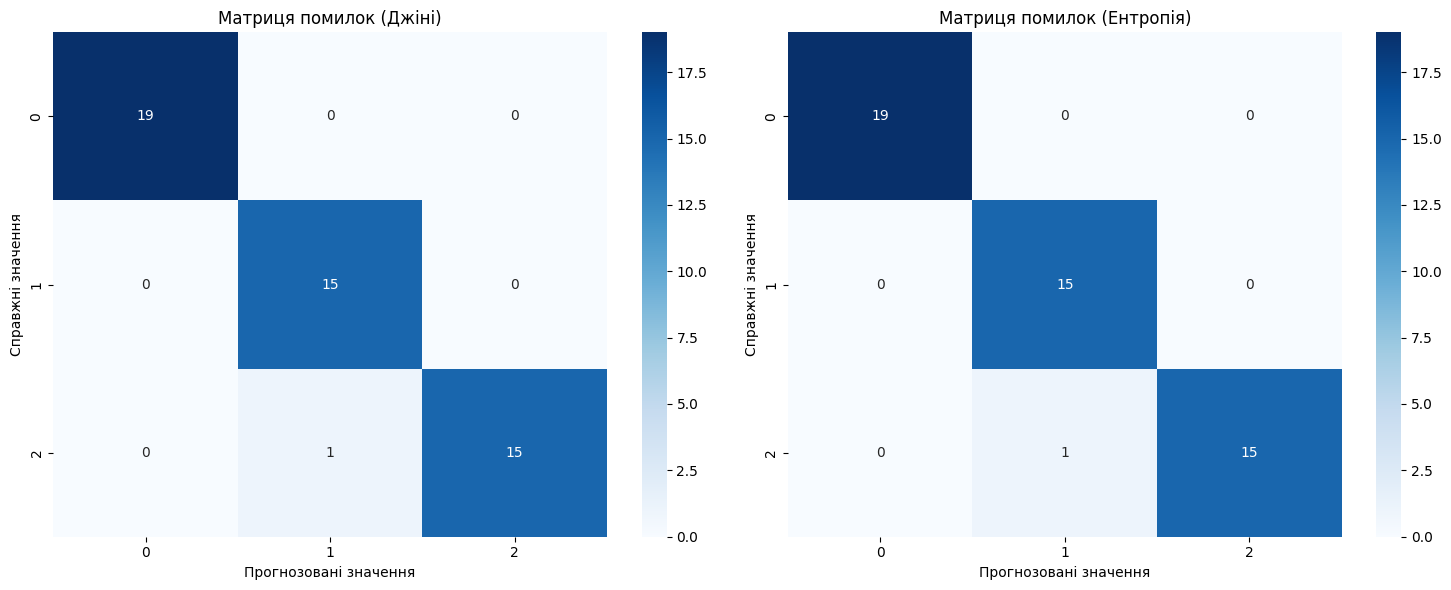

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Створення матриці помилок для критерію Джіні
cm_gini = confusion_matrix(y_test, y_pred_gini)

# Створення матриці помилок для критерію ентропії 
cm_en = confusion_matrix(y_test, y_pred_en)

# Візуалізація матриць помилок
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.heatmap(cm_gini, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця помилок (Джіні)')
plt.ylabel('Справжні значення')
plt.xlabel('Прогнозовані значення')

plt.subplot(1,2,2)
sns.heatmap(cm_en, annot=True, fmt='d', cmap='Blues')
plt.title('Матриця помилок (Ентропія)')
plt.ylabel('Справжні значення')
plt.xlabel('Прогнозовані значення')

plt.tight_layout()
plt.show()


## Класифікаційний звіт

In [12]:
from sklearn.metrics import classification_report

print('Класифікаційний звіт:\n')
print(classification_report(y_test, y_pred_en))

Класифікаційний звіт:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## Візуалізація дерева рішень

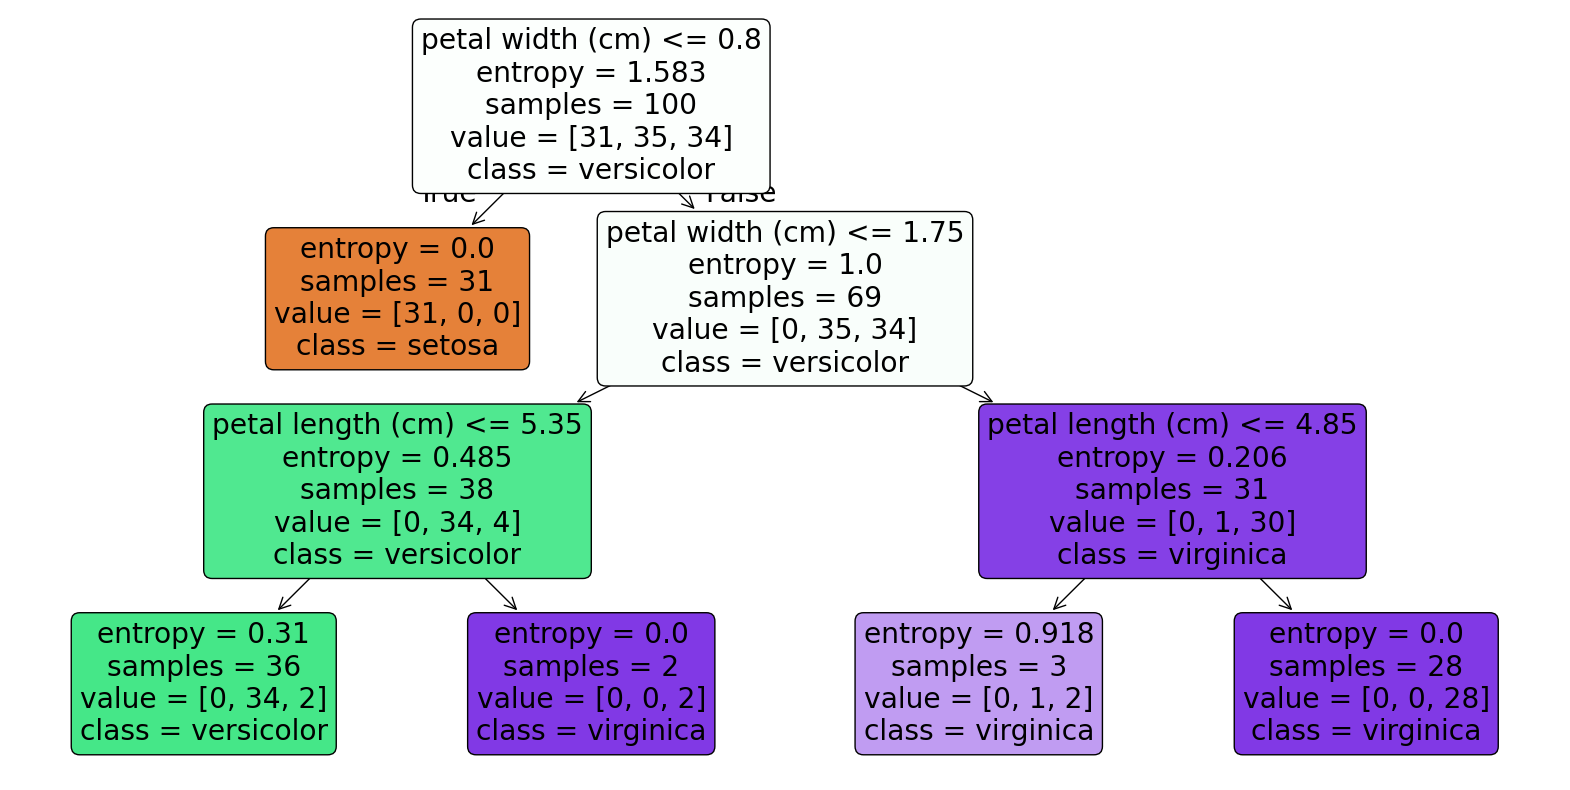

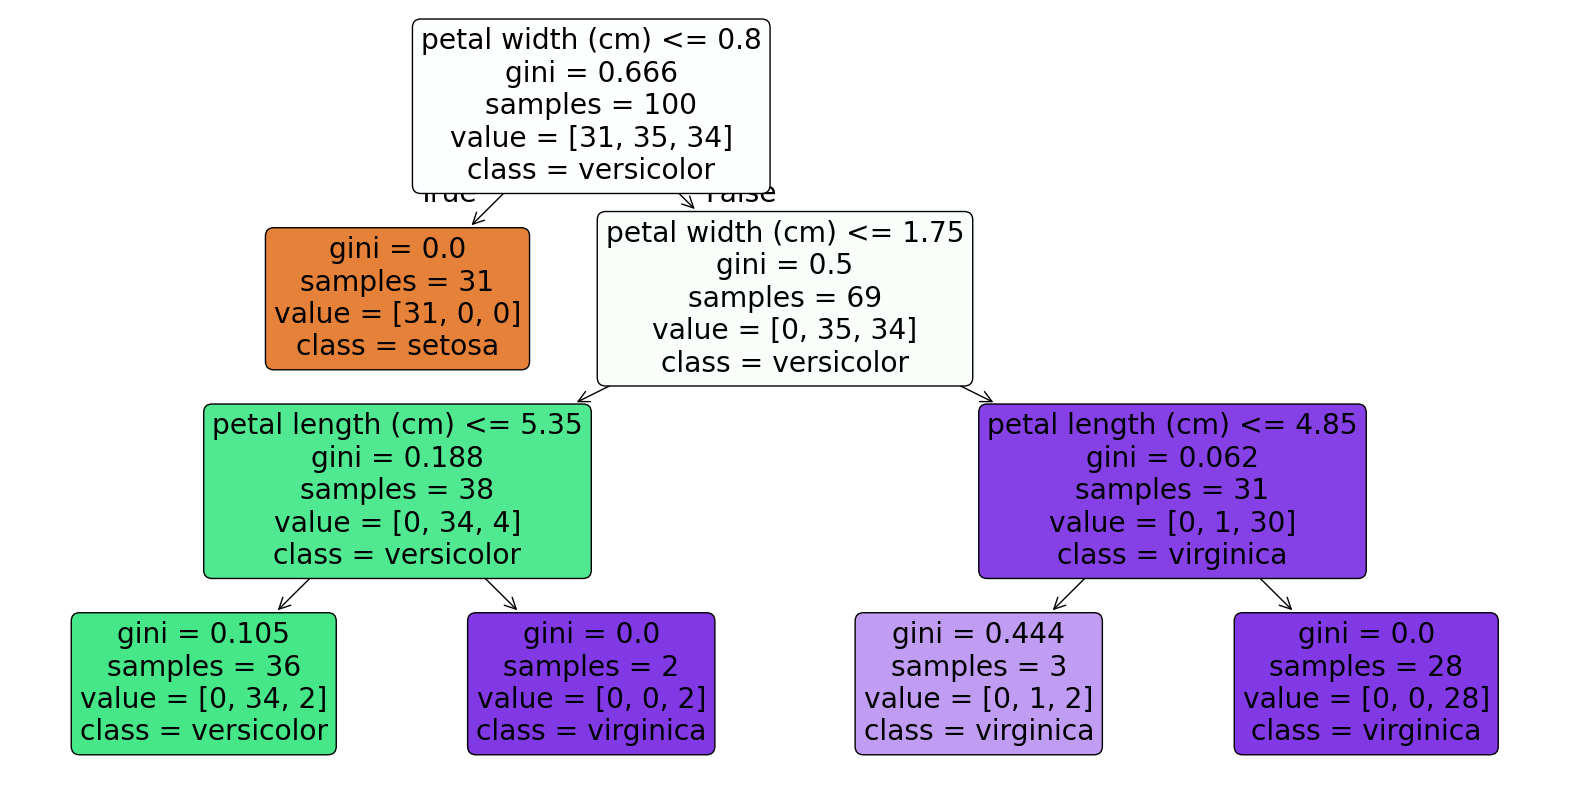

In [15]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_en, feature_names=iris.feature_names, class_names=iris.target_names, 
          filled=True, rounded=True)
plt.show()

plt.figure(figsize=(20,10))
plot_tree(clf_gini, feature_names=iris.feature_names, class_names=iris.target_names, 
          filled=True, rounded=True)
plt.show()

## Підсумки та висновки

1. У цьому проекті побудовано модель класифікатора Decision Tree для класифікації видів ірисів. 
2. Створено дві моделі з різними критеріями розщеплення: індекс Джіні та ентропія.
3. Обидві моделі показали схожі результати, що свідчить про стабільність алгоритму.
4. Візуалізація дерева рішень дозволяє зрозуміти, як модель приймає рішення.
5. Матриця помилок та класифікаційний звіт надають детальну інформацію про якість класифікації для кожного класу.